# Diagnosis and DIA (Data Inspection Assistant)

If you cannot import this module, please try: pip install "polars_ds[plot]"

The dataset used for dependency detection can be found on github.

The plotly plots cannot be rendered on github.

In [1]:
import polars as pl
import polars_ds as pds
from polars_ds.diagnosis import DIA

In [2]:
df = pds.frame(size=1_000_000).select(
    pds.random(0.0, 12.0).alias("uniform_1"),
    pds.random(0.0, 1.0).alias("uniform_2"),
    pds.random_exp(0.5).alias("exp"),
    pds.random_normal(0.0, 1.0).alias("normal"),
    pds.random_normal(0.0, 1000.0).alias("fat_normal"),
).with_columns(
    pl.concat_list("uniform_2", 1 - pl.col("uniform_2")).alias("list_prob")
)
df.head()

shape: (5, 6)
┌───────────┬───────────┬──────────┬───────────┬──────────────┬──────────────────────┐
│ uniform_1 ┆ uniform_2 ┆ exp      ┆ normal    ┆ fat_normal   ┆ list_prob            │
│ ---       ┆ ---       ┆ ---      ┆ ---       ┆ ---          ┆ ---                  │
│ f64       ┆ f64       ┆ f64      ┆ f64       ┆ f64          ┆ list[f64]            │
╞═══════════╪═══════════╪══════════╪═══════════╪══════════════╪══════════════════════╡
│ 10.622245 ┆ 0.998828  ┆ 0.644676 ┆ 0.750798  ┆ 1917.802852  ┆ [0.998828, 0.001172] │
│ 7.630765  ┆ 0.225496  ┆ 0.943008 ┆ -0.477638 ┆ 269.501573   ┆ [0.225496, 0.774504] │
│ 6.207368  ┆ 0.557925  ┆ 0.452374 ┆ -0.817144 ┆ 375.914056   ┆ [0.557925, 0.442075] │
│ 7.117092  ┆ 0.595412  ┆ 0.26715  ┆ -0.897684 ┆ -1243.668671 ┆ [0.595412, 0.404588] │
│ 3.71062   ┆ 0.930829  ┆ 1.070254 ┆ 1.047609  ┆ -1349.054496 ┆ [0.930829, 0.069171] │
└───────────┴───────────┴──────────┴───────────┴──────────────┴──────────────────────┘

In [3]:
dia = DIA(df)

In [4]:
dia.special_values_report()

shape: (5, 7)
┌────────────┬────────────┬───────┬───────────┬──────┬───────────┬──────┐
│ column     ┆ null_count ┆ null% ┆ NaN_count ┆ NaN% ┆ inf_count ┆ Inf% │
│ ---        ┆ ---        ┆ ---   ┆ ---       ┆ ---  ┆ ---       ┆ ---  │
│ str        ┆ u32        ┆ f64   ┆ u32       ┆ f64  ┆ u32       ┆ f64  │
╞════════════╪════════════╪═══════╪═══════════╪══════╪═══════════╪══════╡
│ uniform_1  ┆ 0          ┆ 0.0   ┆ 0         ┆ 0.0  ┆ 0         ┆ 0.0  │
│ uniform_2  ┆ 0          ┆ 0.0   ┆ 0         ┆ 0.0  ┆ 0         ┆ 0.0  │
│ exp        ┆ 0          ┆ 0.0   ┆ 0         ┆ 0.0  ┆ 0         ┆ 0.0  │
│ normal     ┆ 0          ┆ 0.0   ┆ 0         ┆ 0.0  ┆ 0         ┆ 0.0  │
│ fat_normal ┆ 0          ┆ 0.0   ┆ 0         ┆ 0.0  ┆ 0         ┆ 0.0  │
└────────────┴────────────┴───────┴───────────┴──────┴───────────┴──────┘

In [5]:
# Only shows for numerical columns
dia.numeric_profile(histogram=True)

GT(_tbl_data=shape: (5, 13)
┌────────────┬────────────┬───────┬──────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ column     ┆ non_null_c ┆ null% ┆ mean     ┆ … ┆ max        ┆ IQR        ┆ outlier_c ┆ histogram │
│ ---        ┆ nt         ┆ ---   ┆ ---      ┆   ┆ ---        ┆ ---        ┆ nt        ┆ ---       │
│ str        ┆ ---        ┆ f64   ┆ f64      ┆   ┆ f64        ┆ f64        ┆ ---       ┆ struct[1] │
│            ┆ u32        ┆       ┆          ┆   ┆            ┆            ┆ u32       ┆           │
╞════════════╪════════════╪═══════╪══════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
│ uniform_1  ┆ 1000000    ┆ 0.0   ┆ 5.995808 ┆ … ┆ 11.999957  ┆ 5.993485   ┆ 0         ┆ {[49724,  │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ 50196, …  │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ 49440]}   │
│ uniform_2  ┆ 1000000    ┆ 0.0   ┆ 0.500779 ┆ … ┆ 0.999998   ┆ 0.50016    ┆ 0         ┆ {[49974,  │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ 49829, …  │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ 50240]}   │
│ exp        ┆ 1000000    ┆ 0.0   ┆ 2.002384 ┆ … ┆ 24.059821  ┆ 2.194714   ┆ 48520     ┆ {[451552, │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ 248304, … │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ 4]}       │
│ normal     ┆ 1000000    ┆ 0.0   ┆ 0.000419 ┆ … ┆ 4.692256   ┆ 1.348899   ┆ 6921      ┆ {[8, 62,  │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ … 12]}    │
│ fat_normal ┆ 1000000    ┆ 0.0   ┆ 1.210535 ┆ … ┆ 4867.84802 ┆ 1347.96650 ┆ 7157      ┆ {[6, 45,  │
│            ┆            ┆       ┆          ┆   ┆ 1          ┆ 8          ┆           ┆ … 9]}     │
└────────────┴────────────┴───────┴──────────┴───┴────────────┴────────────┴───────────┴───────────┘, _body=<great_tables._gt_data.Body object at 0x7313a5b55160>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='non_null_cnt', type=<ColInfoTypeEnum.default: 1>, column_label='non_null_cnt', column_align='center', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='mean', type=<ColInfoTypeEnum.default: 1>, column_label='mean', column_align='right', column_width=None), ColInfo(var='std', type=<ColInfoTypeEnum.default: 1>, column_label='std', column_align='right', column_width=None), ColInfo(var='min', type=<ColInfoTypeEnum.default: 1>, column_label='min', column_align='right', column_width=None), ColInfo(var='q1', type=<ColInfoTypeEnum.default: 1>, column_label='q1', column_align='right', column_width=None), ColInfo(var='median', type=<ColInfoTypeEnum.default: 1>, column_label='median', column_align='right', column_width=None), ColInfo(var='q3', type=<ColInfoTypeEnum.default: 1>, column_label='q3', column_align='right', column_width=None), ColInfo(var='max', type=<ColInfoTypeEnum.default: 1>, column_label='max', column_align='right', column_width=None), ColInfo(var='IQR', type=<ColInfoTypeEnum.default: 1>, column_label='IQR', column_align='right', column_width=None), ColInfo(var='outlier_cnt', type=<ColInfoTypeEnum.default: 1>, column_label='outlier_cnt', column_align='center', column_width=None), ColInfo(var='histogram', type=<ColInfoTypeEnum.default: 1>, column_label='histogram', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7313639d91c0>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead='column', _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7313623a6090>, _formats=[<great_tables._gt

In [6]:
# Don't compute histogram. Use Polars as output format instead of GT
dia.numeric_profile(histogram=False, gt=False) 

shape: (5, 12)
┌────────────┬────────────┬───────┬──────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ column     ┆ non_null_c ┆ null% ┆ mean     ┆ … ┆ q3         ┆ max        ┆ IQR       ┆ outlier_c │
│ ---        ┆ nt         ┆ ---   ┆ ---      ┆   ┆ ---        ┆ ---        ┆ ---       ┆ nt        │
│ str        ┆ ---        ┆ f64   ┆ f64      ┆   ┆ f64        ┆ f64        ┆ f64       ┆ ---       │
│            ┆ u32        ┆       ┆          ┆   ┆            ┆            ┆           ┆ u32       │
╞════════════╪════════════╪═══════╪══════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
│ uniform_1  ┆ 1000000    ┆ 0.0   ┆ 5.995808 ┆ … ┆ 8.990972   ┆ 11.999957  ┆ 5.993485  ┆ 0         │
│ uniform_2  ┆ 1000000    ┆ 0.0   ┆ 0.500779 ┆ … ┆ 0.751069   ┆ 0.999998   ┆ 0.50016   ┆ 0         │
│ exp        ┆ 1000000    ┆ 0.0   ┆ 2.002384 ┆ … ┆ 2.771894   ┆ 24.059821  ┆ 2.194714  ┆ 48520     │
│ normal     ┆ 1000000    ┆ 0.0   ┆ 0.000419 ┆ … ┆ 0.674701   ┆ 4.692256   ┆ 1.348899  ┆ 6921      │
│ fat_normal ┆ 1000000    ┆ 0.0   ┆ 1.210535 ┆ … ┆ 674.896177 ┆ 4867.84802 ┆ 1347.9665 ┆ 7157      │
│            ┆            ┆       ┆          ┆   ┆            ┆ 1          ┆ 08        ┆           │
└────────────┴────────────┴───────┴──────────┴───┴────────────┴────────────┴───────────┴───────────┘

In [7]:
dia.infer_corr()

shape: (10, 3)
┌───────────┬────────────┬───────────┐
│ x         ┆ y          ┆ corr      │
│ ---       ┆ ---        ┆ ---       │
│ str       ┆ str        ┆ f64       │
╞═══════════╪════════════╪═══════════╡
│ uniform_1 ┆ fat_normal ┆ -0.002502 │
│ uniform_1 ┆ uniform_2  ┆ 0.002204  │
│ uniform_1 ┆ exp        ┆ 0.001724  │
│ exp       ┆ normal     ┆ -0.001167 │
│ uniform_2 ┆ normal     ┆ -0.001096 │
│ normal    ┆ fat_normal ┆ -0.000966 │
│ uniform_1 ┆ normal     ┆ -0.000842 │
│ uniform_2 ┆ exp        ┆ -0.0008   │
│ exp       ┆ fat_normal ┆ 0.00076   │
│ uniform_2 ┆ fat_normal ┆ -0.000397 │
└───────────┴────────────┴───────────┘

In [8]:
dia.infer_corr(method="kendall")

shape: (10, 3)
┌───────────┬────────────┬───────────┐
│ x         ┆ y          ┆ corr      │
│ ---       ┆ ---        ┆ ---       │
│ str       ┆ str        ┆ f64       │
╞═══════════╪════════════╪═══════════╡
│ uniform_1 ┆ fat_normal ┆ -0.001858 │
│ uniform_1 ┆ uniform_2  ┆ 0.001472  │
│ uniform_1 ┆ exp        ┆ 0.000655  │
│ uniform_1 ┆ normal     ┆ -0.000654 │
│ uniform_2 ┆ normal     ┆ -0.000569 │
│ uniform_2 ┆ exp        ┆ -0.000471 │
│ normal    ┆ fat_normal ┆ -0.000446 │
│ exp       ┆ fat_normal ┆ 0.000356  │
│ uniform_2 ┆ fat_normal ┆ -0.000195 │
│ exp       ┆ normal     ┆ -0.00002  │
└───────────┴────────────┴───────────┘

In [9]:
dia.meta()

{'numerics': ['uniform_1', 'uniform_2', 'exp', 'normal', 'fat_normal'],
 'ints': [],
 'floats': ['uniform_1', 'uniform_2', 'exp', 'normal', 'fat_normal'],
 'strs': [],
 'bools': [],
 'cats': [],
 'list_floats': ['list_prob'],
 'list_bool': [],
 'list_str': [],
 'list_ints': [],
 'simple_types': ['uniform_1',
  'uniform_2',
  'exp',
  'normal',
  'fat_normal',
  'list_prob'],
 'other_types': []}

In [10]:
# Uniform_2 can potentially be a probability score column (e.g. output of predict_proba, but taking values only for class =1)
# list_prob can potentially be a 2-class probability column (e.g. output of predict_proba)
dia.infer_prob()

['uniform_2', 'list_prob']

# Dependency Detection, Null Distributions, Distribution Comparisons

Does knowing values in column A tell us values in column B?

In [11]:
df = pl.read_parquet("dependency.parquet")
df.head()

shape: (5, 22)
┌────────────────┬────────┬──────────┬────────────────┬───┬───────────────┬──────┬──────┬──────────┐
│ ID             ┆ Gender ┆ DOB      ┆ Lead_Creation_ ┆ … ┆ Interest_Rate ┆ EMI  ┆ Var1 ┆ Approved │
│ ---            ┆ ---    ┆ ---      ┆ Date           ┆   ┆ ---           ┆ ---  ┆ ---  ┆ ---      │
│ str            ┆ str    ┆ str      ┆ ---            ┆   ┆ f64           ┆ i64  ┆ i64  ┆ i64      │
│                ┆        ┆          ┆ str            ┆   ┆               ┆      ┆      ┆          │
╞════════════════╪════════╪══════════╪════════════════╪═══╪═══════════════╪══════╪══════╪══════════╡
│ APPC9049317122 ┆ Female ┆ 23/07/79 ┆ 15/07/16       ┆ … ┆ null          ┆ null ┆ 0    ┆ 0        │
│ 5              ┆        ┆          ┆                ┆   ┆               ┆      ┆      ┆          │
│ APPD4061126334 ┆ Male   ┆ 07/12/86 ┆ 04/07/16       ┆ … ┆ 13.25         ┆ 953  ┆ 10   ┆ 0        │
│ 4              ┆        ┆          ┆                ┆   ┆               ┆      ┆      ┆          │
│ APPE7028924942 ┆ Male   ┆ 10/12/82 ┆ 19/07/16       ┆ … ┆ null          ┆ null ┆ 0    ┆ 0        │
│ 3              ┆        ┆          ┆                ┆   ┆               ┆      ┆      ┆          │
│ APPF8027386553 ┆ Male   ┆ 30/01/89 ┆ 09/07/16       ┆ … ┆ null          ┆ null ┆ 7    ┆ 0        │
│ 7              ┆        ┆          ┆                ┆   ┆               ┆      ┆      ┆          │
│ APPG6099443664 ┆ Male   ┆ 19/04/85 ┆ 20/07/16       ┆ … ┆ null          ┆ null ┆ 10   ┆ 0        │
│ 1              ┆        ┆          ┆                ┆   ┆               ┆      ┆      ┆          │
└────────────────┴────────┴──────────┴────────────────┴───┴───────────────┴──────┴──────┴──────────┘

In [12]:
df.shape

(69713, 22)

In [13]:
dia = DIA(df)

In [14]:
dia.infer_dependency()

Checking dependency for columns: ['Gender', 'Contacted', 'Approved', 'Primary_Bank_Type', 'City_Category', 'Employer_Category1', 'Employer_Category2', 'Var1', 'Source_Category', 'Loan_Period', 'Source', 'Customer_Existing_Primary_Bank_Code', 'Lead_Creation_Date', 'Loan_Amount', 'City_Code', 'EMI', 'DOB', 'Employer_Code', 'ID'].


shape: (171, 3)
┌────────────────────┬─────────────────────────────────┬──────────────┐
│ column             ┆ by                              ┆ cond_entropy │
│ ---                ┆ ---                             ┆ ---          │
│ str                ┆ str                             ┆ f64          │
╞════════════════════╪═════════════════════════════════╪══════════════╡
│ Gender             ┆ ID                              ┆ 0.0          │
│ Contacted          ┆ ID                              ┆ 0.0          │
│ Approved           ┆ ID                              ┆ 0.0          │
│ Primary_Bank_Type  ┆ Customer_Existing_Primary_Bank… ┆ 0.0          │
│ Primary_Bank_Type  ┆ ID                              ┆ 0.0          │
│ …                  ┆ …                               ┆ …            │
│ Loan_Amount        ┆ City_Code                       ┆ 2.702889     │
│ City_Code          ┆ EMI                             ┆ 3.147327     │
│ Lead_Creation_Date ┆ EMI                             ┆ 3.92818      │
│ Lead_Creation_Date ┆ City_Code                       ┆ 4.204907     │
│ Lead_Creation_Date ┆ Loan_Amount                     ┆ 4.336805     │
└────────────────────┴─────────────────────────────────┴──────────────┘

Checking dependency for columns: ['Gender', 'Contacted', 'Approved', 'Primary_Bank_Type', 'City_Category', 'Employer_Category1', 'Employer_Category2', 'Var1', 'Source_Category', 'Loan_Period', 'Source', 'Customer_Existing_Primary_Bank_Code', 'Lead_Creation_Date', 'Loan_Amount', 'City_Code', 'EMI', 'DOB', 'Employer_Code', 'ID'].


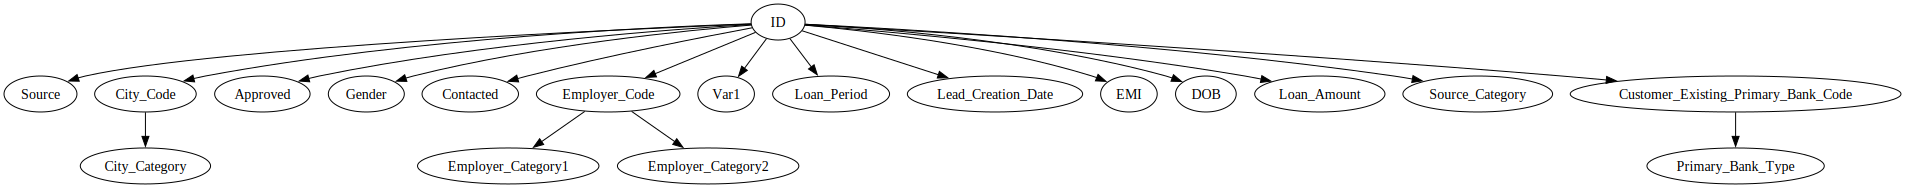

In [15]:
dia.plot_dependency()

Checking dependency for columns: ['Gender', 'Contacted', 'Approved', 'Primary_Bank_Type', 'City_Category', 'Employer_Category1', 'Employer_Category2', 'Var1', 'Source_Category', 'Loan_Period', 'Source', 'Customer_Existing_Primary_Bank_Code', 'Lead_Creation_Date', 'Loan_Amount', 'City_Code', 'EMI', 'DOB', 'Employer_Code', 'ID'].


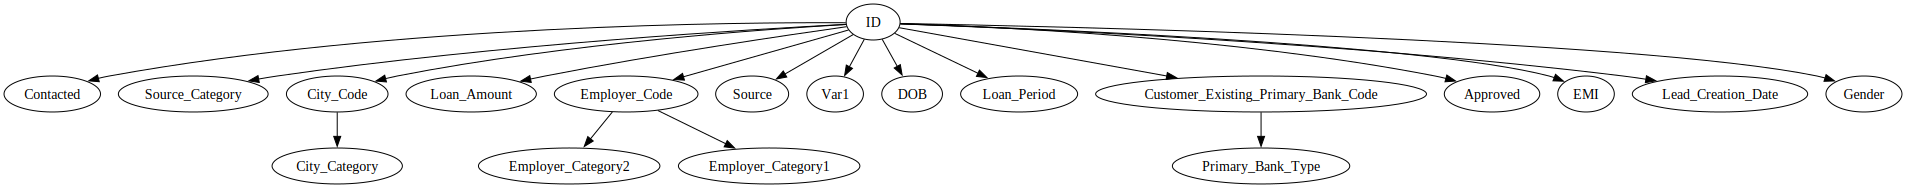

In [16]:
# ID implies everything, of course, because ID is unique.
# So let's not plot it
dia.plot_dependency(subset=pl.all().exclude("ID"))

In [17]:
dia.str_stats()

shape: (13, 13)
┌───────────┬───────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ column    ┆ null_coun ┆ n_unique ┆ most_freq ┆ … ┆ max_byte_ ┆ max_char_ ┆ 5p_byte_l ┆ 95p_byte_ │
│ ---       ┆ t         ┆ ---      ┆ ---       ┆   ┆ len       ┆ len       ┆ en        ┆ len       │
│ str       ┆ ---       ┆ u32      ┆ str       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│           ┆ u32       ┆          ┆           ┆   ┆ u32       ┆ u32       ┆ f64       ┆ f64       │
╞═══════════╪═══════════╪══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ ID        ┆ 0         ┆ 69713    ┆ APPC90493 ┆ … ┆ 15        ┆ 15        ┆ 15.0      ┆ 15.0      │
│           ┆           ┆          ┆ 171225    ┆   ┆           ┆           ┆           ┆           │
│ Gender    ┆ 0         ┆ 2        ┆ Male      ┆ … ┆ 6         ┆ 6         ┆ 4.0       ┆ 6.0       │
│ DOB       ┆ 15        ┆ 10760    ┆ 11/01/82  ┆ … ┆ 8         ┆ 8         ┆ 8.0       ┆ 8.0       │
│ Lead_Crea ┆ 0         ┆ 92       ┆ 02/09/16  ┆ … ┆ 8         ┆ 8         ┆ 8.0       ┆ 8.0       │
│ tion_Date ┆           ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ City_Code ┆ 814       ┆ 679      ┆ C10001    ┆ … ┆ 6         ┆ 6         ┆ 6.0       ┆ 6.0       │
│ …         ┆ …         ┆ …        ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ Customer_ ┆ 9391      ┆ 58       ┆ B001      ┆ … ┆ 4         ┆ 4         ┆ 4.0       ┆ 4.0       │
│ Existing_ ┆           ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ Primary_B ┆           ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ ank…      ┆           ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ Primary_B ┆ 9391      ┆ 3        ┆ P         ┆ … ┆ 1         ┆ 1         ┆ 1.0       ┆ 1.0       │
│ ank_Type  ┆           ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ Contacted ┆ 0         ┆ 2        ┆ Y         ┆ … ┆ 1         ┆ 1         ┆ 1.0       ┆ 1.0       │
│ Source    ┆ 0         ┆ 29       ┆ S122      ┆ … ┆ 4         ┆ 4         ┆ 4.0       ┆ 4.0       │
│ Source_Ca ┆ 0         ┆ 7        ┆ B         ┆ … ┆ 1         ┆ 1         ┆ 1.0       ┆ 1.0       │
│ tegory    ┆           ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
└───────────┴───────────┴──────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [18]:
dia.numeric_profile(iqr_multiplier=2)

GT(_tbl_data=shape: (9, 13)
┌────────────┬────────────┬──────────┬────────────┬───┬──────────┬─────────┬───────────┬───────────┐
│ column     ┆ non_null_c ┆ null%    ┆ mean       ┆ … ┆ max      ┆ IQR     ┆ outlier_c ┆ histogram │
│ ---        ┆ nt         ┆ ---      ┆ ---        ┆   ┆ ---      ┆ ---     ┆ nt        ┆ ---       │
│ str        ┆ ---        ┆ f64      ┆ f64        ┆   ┆ f64      ┆ f64     ┆ ---       ┆ struct[1] │
│            ┆ u32        ┆          ┆            ┆   ┆          ┆         ┆ u32       ┆           │
╞════════════╪════════════╪══════════╪════════════╪═══╪══════════╪═════════╪═══════════╪═══════════╡
│ Employer_C ┆ 65415      ┆ 0.061653 ┆ 3.720187   ┆ … ┆ 4.0      ┆ 0.0     ┆ 7833      ┆ {[4298,   │
│ ategory2   ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 4258, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 57582]}   │
│ Monthly_In ┆ 69713      ┆ 0.0      ┆ 5622.2832  ┆ … ┆ 3.8384e7 ┆ 2350.0  ┆ 3920      ┆ {[69699,  │
│ come       ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 5, … 1]}  │
│ Existing_E ┆ 69662      ┆ 0.000732 ┆ 360.928751 ┆ … ┆ 545436.5 ┆ 350.0   ┆ 6549      ┆ {[69655,  │
│ MI         ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 5, … 1]}  │
│ Loan_Amoun ┆ 42004      ┆ 0.397472 ┆ 39429.9828 ┆ … ┆ 300000.0 ┆ 30000.0 ┆ 1547      ┆ {[27709,  │
│ t          ┆            ┆          ┆ 59         ┆   ┆          ┆         ┆           ┆ 8646, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 4]}       │
│ Loan_Perio ┆ 42004      ┆ 0.397472 ┆ 3.890629   ┆ … ┆ 6.0      ┆ 2.0     ┆ 0         ┆ {[27709,  │
│ d          ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 1886, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 1]}       │
│ Interest_R ┆ 22276      ┆ 0.680461 ┆ 19.21357   ┆ … ┆ 37.0     ┆ 4.75    ┆ 2378      ┆ {[758,    │
│ ate        ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 2752, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 240]}     │
│ EMI        ┆ 22276      ┆ 0.680461 ┆ 1101.46624 ┆ … ┆ 13556.0  ┆ 646.0   ┆ 1081      ┆ {[47437,  │
│            ┆            ┆          ┆ 2          ┆   ┆          ┆         ┆           ┆ 8179, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 2]}       │
│ Var1       ┆ 69713      ┆ 0.0      ┆ 3.948446   ┆ … ┆ 10.0     ┆ 7.0     ┆ 0         ┆ {[23308,  │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 13363, …  │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 13420]}   │
│ Approved   ┆ 69713      ┆ 0.0      ┆ 0.014631   ┆ … ┆ 1.0      ┆ 0.0     ┆ 1020      ┆ {[68693,  │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 1020]}    │
└────────────┴────────────┴──────────┴────────────┴───┴──────────┴─────────┴───────────┴───────────┘, _body=<great_tables._gt_data.Body object at 0x731362216ae0>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='non_null_cnt', type=<ColInfoTypeEnum.default: 1>, column_label='non_null_cnt', column_align='center', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='mean', type=<ColInfoTypeEnum.default: 1>, column_label='mean', column_align='right', column_width=None), ColInfo(var='std', type=<ColInfoTypeEnum.default: 1>, column_label='std', column_align='right', column_width=None), ColInfo(var='min', type=<ColInfoTypeEnum.default: 1>, column_label='min', column_align='right', column_width=None), ColInfo(var='q1', type=<ColInfoTypeEnu

In [19]:
import polars.selectors as cs

dia.corr(subset=["Monthly_Income", "Existing_EMI"])

shape: (2, 10)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬──────────┬──────────┬──────────┐
│ column     ┆ Employer_C ┆ Monthly_I ┆ Existing_ ┆ … ┆ Interest_ ┆ EMI      ┆ Var1     ┆ Approved │
│ ---        ┆ ategory2   ┆ ncome     ┆ EMI       ┆   ┆ Rate      ┆ ---      ┆ ---      ┆ ---      │
│ str        ┆ ---        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ f64      ┆ f64      ┆ f64      │
│            ┆ f64        ┆ f64       ┆ f64       ┆   ┆ f64       ┆          ┆          ┆          │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪══════════╪══════════╡
│ Monthly_In ┆ 0.001546   ┆ 1.0       ┆ 0.245826  ┆ … ┆ -0.014789 ┆ 0.035163 ┆ 0.024854 ┆ 0.000472 │
│ come       ┆            ┆           ┆           ┆   ┆           ┆          ┆          ┆          │
│ Existing_E ┆ -0.017074  ┆ 0.245826  ┆ 1.0       ┆ … ┆ -0.023001 ┆ 0.000813 ┆ 0.00662  ┆ 0.027821 │
│ MI         ┆            ┆           ┆           ┆   ┆           ┆          ┆          ┆          │
└────────────┴────────────┴───────────┴───────────┴───┴───────────┴──────────┴──────────┴──────────┘

In [20]:
dia.corr(subset=cs.all(), method="spearman")

shape: (22, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ column    ┆ Employer_ ┆ Monthly_I ┆ Existing_ ┆ … ┆ Interest_ ┆ EMI       ┆ Var1      ┆ Approved │
│ ---       ┆ Category2 ┆ ncome     ┆ EMI       ┆   ┆ Rate      ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ f64       ┆ f64       ┆ f64      │
│           ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ ID        ┆ NaN       ┆ NaN       ┆ NaN       ┆ … ┆ NaN       ┆ NaN       ┆ NaN       ┆ NaN      │
│ Gender    ┆ NaN       ┆ NaN       ┆ NaN       ┆ … ┆ NaN       ┆ NaN       ┆ NaN       ┆ NaN      │
│ DOB       ┆ NaN       ┆ NaN       ┆ NaN       ┆ … ┆ NaN       ┆ NaN       ┆ NaN       ┆ NaN      │
│ Lead_Crea ┆ NaN       ┆ NaN       ┆ NaN       ┆ … ┆ NaN       ┆ NaN       ┆ NaN       ┆ NaN      │
│ tion_Date ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ City_Code ┆ NaN       ┆ NaN       ┆ NaN       ┆ … ┆ NaN       ┆ NaN       ┆ NaN       ┆ NaN      │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ Loan_Peri ┆ -0.007449 ┆ -0.003671 ┆ -0.004603 ┆ … ┆ -0.096629 ┆ 0.083965  ┆ -0.065702 ┆ -0.00037 │
│ od        ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 5        │
│ Interest_ ┆ 0.177605  ┆ -0.014789 ┆ -0.023001 ┆ … ┆ 1.0       ┆ -0.241648 ┆ -0.554138 ┆ -0.09438 │
│ Rate      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 7        │
│ EMI       ┆ -0.051729 ┆ 0.035163  ┆ 0.000813  ┆ … ┆ -0.241648 ┆ 1.0       ┆ 0.293474  ┆ 0.050129 │
│ Var1      ┆ -0.124415 ┆ 0.024854  ┆ 0.00662   ┆ … ┆ -0.554138 ┆ 0.293474  ┆ 1.0       ┆ 0.11244  │
│ Approved  ┆ -0.019413 ┆ 0.000472  ┆ 0.027821  ┆ … ┆ -0.094387 ┆ 0.050129  ┆ 0.11244   ┆ 1.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [21]:
dia.plot_corr(subset=["Monthly_Income", "Existing_EMI"], method="spearman")

GT(_tbl_data=shape: (2, 10)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬──────────┬──────────┬──────────┐
│ column     ┆ Employer_C ┆ Monthly_I ┆ Existing_ ┆ … ┆ Interest_ ┆ EMI      ┆ Var1     ┆ Approved │
│ ---        ┆ ategory2   ┆ ncome     ┆ EMI       ┆   ┆ Rate      ┆ ---      ┆ ---      ┆ ---      │
│ str        ┆ ---        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ f64      ┆ f64      ┆ f64      │
│            ┆ f64        ┆ f64       ┆ f64       ┆   ┆ f64       ┆          ┆          ┆          │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪══════════╪══════════╡
│ Monthly_In ┆ 0.001546   ┆ 1.0       ┆ 0.245826  ┆ … ┆ -0.014789 ┆ 0.035163 ┆ 0.024854 ┆ 0.000472 │
│ come       ┆            ┆           ┆           ┆   ┆           ┆          ┆          ┆          │
│ Existing_E ┆ -0.017074  ┆ 0.245826  ┆ 1.0       ┆ … ┆ -0.023001 ┆ 0.000813 ┆ 0.00662  ┆ 0.027821 │
│ MI         ┆            ┆           ┆           ┆   ┆           ┆          ┆          ┆          │
└────────────┴────────────┴───────────┴───────────┴───┴───────────┴──────────┴──────────┴──────────┘, _body=<great_tables._gt_data.Body object at 0x731362217b90>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.default: 1>, column_label='column', column_align='left', column_width=None), ColInfo(var='Employer_Category2', type=<ColInfoTypeEnum.default: 1>, column_label='Employer_Category2', column_align='right', column_width=None), ColInfo(var='Monthly_Income', type=<ColInfoTypeEnum.default: 1>, column_label='Monthly_Income', column_align='right', column_width=None), ColInfo(var='Existing_EMI', type=<ColInfoTypeEnum.default: 1>, column_label='Existing_EMI', column_align='right', column_width=None), ColInfo(var='Loan_Amount', type=<ColInfoTypeEnum.default: 1>, column_label='Loan_Amount', column_align='right', column_width=None), ColInfo(var='Loan_Period', type=<ColInfoTypeEnum.default: 1>, column_label='Loan_Period', column_align='right', column_width=None), ColInfo(var='Interest_Rate', type=<ColInfoTypeEnum.default: 1>, column_label='Interest_Rate', column_align='right', column_width=None), ColInfo(var='EMI', type=<ColInfoTypeEnum.default: 1>, column_label='EMI', column_align='right', column_width=None), ColInfo(var='Var1', type=<ColInfoTypeEnum.default: 1>, column_label='Var1', column_align='right', column_width=None), ColInfo(var='Approved', type=<ColInfoTypeEnum.default: 1>, column_label='Approved', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x731362214770>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname='data', locnum=5, grpname=None, colname='Employer_Category2', rownum=0, colnum=None, styles=[CellStyleText(color='#FFFFFF', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#60027a')]), StyleInfo(locname='data', locnum=5, grpname=None, colname='Employer_Category2', rownum=1, colnum=None, styles=[CellStyleText(color='#FFFFFF', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#5e027b')]), StyleInfo(locname='data', locnum=5, grpname=None, colname='Monthly_Income', rownum=0, colnum=None, styles=[CellStyleText(color='#FFFFFF', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#bd0237')]), StyleInfo(locname='data', locnum=5, grpname=None, colname='Monthly_Income', rownum=1, colnum=None, styles=[CellStyleText(color='#FFFFFF', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#76026a')]), StyleInfo(locname='data', locnum=5, 

In [22]:
dia.plot_corr(subset=["Monthly_Income", "Existing_EMI"], method="xi")

GT(_tbl_data=shape: (2, 10)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬──────────┬──────────┬──────────┐
│ column     ┆ Employer_C ┆ Monthly_I ┆ Existing_ ┆ … ┆ Interest_ ┆ EMI      ┆ Var1     ┆ Approved │
│ ---        ┆ ategory2   ┆ ncome     ┆ EMI       ┆   ┆ Rate      ┆ ---      ┆ ---      ┆ ---      │
│ str        ┆ ---        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ f64      ┆ f64      ┆ f64      │
│            ┆ f64        ┆ f64       ┆ f64       ┆   ┆ f64       ┆          ┆          ┆          │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪══════════╪══════════╡
│ Monthly_In ┆ 0.001546   ┆ 1.0       ┆ 0.245826  ┆ … ┆ -0.014789 ┆ 0.035163 ┆ 0.024854 ┆ 0.000472 │
│ come       ┆            ┆           ┆           ┆   ┆           ┆          ┆          ┆          │
│ Existing_E ┆ -0.017074  ┆ 0.245826  ┆ 1.0       ┆ … ┆ -0.023001 ┆ 0.000813 ┆ 0.00662  ┆ 0.027821 │
│ MI         ┆            ┆           ┆           ┆   ┆           ┆          ┆          ┆          │
└────────────┴────────────┴───────────┴───────────┴───┴───────────┴──────────┴──────────┴──────────┘, _body=<great_tables._gt_data.Body object at 0x731362216480>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.default: 1>, column_label='column', column_align='left', column_width=None), ColInfo(var='Employer_Category2', type=<ColInfoTypeEnum.default: 1>, column_label='Employer_Category2', column_align='right', column_width=None), ColInfo(var='Monthly_Income', type=<ColInfoTypeEnum.default: 1>, column_label='Monthly_Income', column_align='right', column_width=None), ColInfo(var='Existing_EMI', type=<ColInfoTypeEnum.default: 1>, column_label='Existing_EMI', column_align='right', column_width=None), ColInfo(var='Loan_Amount', type=<ColInfoTypeEnum.default: 1>, column_label='Loan_Amount', column_align='right', column_width=None), ColInfo(var='Loan_Period', type=<ColInfoTypeEnum.default: 1>, column_label='Loan_Period', column_align='right', column_width=None), ColInfo(var='Interest_Rate', type=<ColInfoTypeEnum.default: 1>, column_label='Interest_Rate', column_align='right', column_width=None), ColInfo(var='EMI', type=<ColInfoTypeEnum.default: 1>, column_label='EMI', column_align='right', column_width=None), ColInfo(var='Var1', type=<ColInfoTypeEnum.default: 1>, column_label='Var1', column_align='right', column_width=None), ColInfo(var='Approved', type=<ColInfoTypeEnum.default: 1>, column_label='Approved', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x731362215d00>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname='data', locnum=5, grpname=None, colname='Employer_Category2', rownum=0, colnum=None, styles=[CellStyleText(color='#FFFFFF', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#60027a')]), StyleInfo(locname='data', locnum=5, grpname=None, colname='Employer_Category2', rownum=1, colnum=None, styles=[CellStyleText(color='#FFFFFF', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#5e027b')]), StyleInfo(locname='data', locnum=5, grpname=None, colname='Monthly_Income', rownum=0, colnum=None, styles=[CellStyleText(color='#FFFFFF', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#bd0237')]), StyleInfo(locname='data', locnum=5, grpname=None, colname='Monthly_Income', rownum=1, colnum=None, styles=[CellStyleText(color='#FFFFFF', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None), CellStyleFill(color='#76026a')]), StyleInfo(locname='data', locnum=5, 

In [23]:
# Checks whether nulls in one feature happens at the same time as nulls in other features
dia.plot_null_distribution(cs.numeric())

GT(_tbl_data=shape: (9, 4)
┌────────────────────┬─────────────────────────────────┬──────────┬───────┐
│ column             ┆ percentages in row groups       ┆ null%    ┆ total │
│ ---                ┆ ---                             ┆ ---      ┆ ---   │
│ str                ┆ struct[1]                       ┆ f64      ┆ i32   │
╞════════════════════╪═════════════════════════════════╪══════════╪═══════╡
│ Employer_Category2 ┆ {[0.014347, 0.010043, … 0.0]}   ┆ 0.061653 ┆ 69713 │
│ Monthly_Income     ┆ {[0.0, 0.0, … 0.0]}             ┆ 0.0      ┆ 69713 │
│ Existing_EMI       ┆ {[0.0, 0.0, … 0.0]}             ┆ 0.000732 ┆ 69713 │
│ Loan_Amount        ┆ {[0.337159, 0.353659, … 0.3076… ┆ 0.397472 ┆ 69713 │
│ Loan_Period        ┆ {[0.337159, 0.353659, … 0.3076… ┆ 0.397472 ┆ 69713 │
│ Interest_Rate      ┆ {[0.631277, 0.631994, … 0.6153… ┆ 0.680461 ┆ 69713 │
│ EMI                ┆ {[0.631277, 0.631994, … 0.6153… ┆ 0.680461 ┆ 69713 │
│ Var1               ┆ {[0.0, 0.0, … 0.0]}             ┆ 0.0      ┆ 69713 │
│ Approved           ┆ {[0.0, 0.0, … 0.0]}             ┆ 0.0      ┆ 69713 │
└────────────────────┴─────────────────────────────────┴──────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x731362264dd0>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='percentages in row groups', type=<ColInfoTypeEnum.default: 1>, column_label='percentages in row groups', column_align='center', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='total', type=<ColInfoTypeEnum.default: 1>, column_label='total', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x731362215910>, _spanners=Spanners([]), _heading=Heading(title='Null Distribution', subtitle=None, preheader=None), _stubhead='column', _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7313622646b0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x7313622654f0>, <great_tables._gt_data.FormatInfo object at 0x7313622652e0>, <great_tables._gt_data.FormatInfo object at 0x731362229220>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, cate

In [24]:
# Checks whether nulls in one feature happens at the same time as nulls in other features
dia.plot_null_distribution(
    cs.numeric(), 
    condition= (pl.col("Source_Category") == 'B')
)

GT(_tbl_data=shape: (9, 4)
┌────────────────────┬─────────────────────────────────┬──────────┬───────┐
│ column             ┆ percentages in row groups       ┆ null%    ┆ total │
│ ---                ┆ ---                             ┆ ---      ┆ ---   │
│ str                ┆ struct[1]                       ┆ f64      ┆ i32   │
╞════════════════════╪═════════════════════════════════╪══════════╪═══════╡
│ Employer_Category2 ┆ {[0.010067, 0.006711, … 0.0]}   ┆ 0.005199 ┆ 29812 │
│ Monthly_Income     ┆ {[0.0, 0.0, … 0.0]}             ┆ 0.0      ┆ 29812 │
│ Existing_EMI       ┆ {[0.0, 0.0, … 0.0]}             ┆ 0.000034 ┆ 29812 │
│ Loan_Amount        ┆ {[0.38255, 0.411074, … 0.41666… ┆ 0.397256 ┆ 29812 │
│ Loan_Period        ┆ {[0.38255, 0.411074, … 0.41666… ┆ 0.397256 ┆ 29812 │
│ Interest_Rate      ┆ {[0.672819, 0.676174, … 0.75]}  ┆ 0.690326 ┆ 29812 │
│ EMI                ┆ {[0.672819, 0.676174, … 0.75]}  ┆ 0.690326 ┆ 29812 │
│ Var1               ┆ {[0.0, 0.0, … 0.0]}             ┆ 0.0      ┆ 29812 │
│ Approved           ┆ {[0.0, 0.0, … 0.0]}             ┆ 0.0      ┆ 29812 │
└────────────────────┴─────────────────────────────────┴──────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x731362214da0>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='percentages in row groups', type=<ColInfoTypeEnum.default: 1>, column_label='percentages in row groups', column_align='center', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='total', type=<ColInfoTypeEnum.default: 1>, column_label='total', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x73136222b650>, _spanners=Spanners([]), _heading=Heading(title='Null Distribution', subtitle=None, preheader=None), _stubhead='column', _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x731362214140>, _formats=[<great_tables._gt_data.FormatInfo object at 0x73136222aed0>, <great_tables._gt_data.FormatInfo object at 0x7313622644d0>, <great_tables._gt_data.FormatInfo object at 0x731362264e90>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, cate

In [25]:
dia.plot_distribution(
    "EMI", 
    by = "Primary_Bank_Type", 
    n_bins=100, 
    density=False, 
    condition= pl.col("EMI").is_between(pl.col("EMI").quantile(0.01), pl.col("EMI").quantile(0.99)),
    # Additional Plotly's kwargs can also be passed 
    opacity = 0.7
)

In [26]:
dia.plot_distribution(
    pl.col("EMI").sqrt().alias("EMI_SQRT"), 
    by = "Primary_Bank_Type", 
    n_bins=100, 
    density=False, 
    condition= pl.col("EMI").is_between(pl.col("EMI").quantile(0.01), pl.col("EMI").quantile(0.99)),
    # Additional Plotly's kwargs can also be passed 
    opacity = 0.7
)

In [27]:
dia.plot_distribution(
    pl.col("EMI"), 
    by = pl.col("Loan_Amount") > 10_000, 
    n_bins=100, 
    density=False, 
    condition= pl.col("EMI").is_between(pl.col("EMI").quantile(0.01), pl.col("EMI").quantile(0.99)),
    # Additional Plotly's kwargs can also be passed 
    opacity = 0.7
)

# Classic Iris Dataset

Need sklearn to download the dataset and that's it.

In [28]:
from sklearn import datasets
dataset = datasets.load_iris()
df = pl.from_numpy(dataset.data, schema = dataset.feature_names).with_columns(
    pl.Series(values=dataset.target).alias("species")
).with_columns(
    pl.when(pl.col("species") == 0).then(pl.lit('setosa'))
    .when(pl.col("species") == 1).then(pl.lit('versicolor'))
    .when(pl.col("species") == 2).then(pl.lit('virginica')).alias("species")
)
df.head()

shape: (5, 5)
┌───────────────────┬──────────────────┬───────────────────┬──────────────────┬─────────┐
│ sepal length (cm) ┆ sepal width (cm) ┆ petal length (cm) ┆ petal width (cm) ┆ species │
│ ---               ┆ ---              ┆ ---               ┆ ---              ┆ ---     │
│ f64               ┆ f64              ┆ f64               ┆ f64              ┆ str     │
╞═══════════════════╪══════════════════╪═══════════════════╪══════════════════╪═════════╡
│ 5.1               ┆ 3.5              ┆ 1.4               ┆ 0.2              ┆ setosa  │
│ 4.9               ┆ 3.0              ┆ 1.4               ┆ 0.2              ┆ setosa  │
│ 4.7               ┆ 3.2              ┆ 1.3               ┆ 0.2              ┆ setosa  │
│ 4.6               ┆ 3.1              ┆ 1.5               ┆ 0.2              ┆ setosa  │
│ 5.0               ┆ 3.6              ┆ 1.4               ┆ 0.2              ┆ setosa  │
└───────────────────┴──────────────────┴───────────────────┴──────────────────┴─────────┘

In [29]:
dia = DIA(df)
dia.plot_pca(pl.all().exclude("species"), by = "species")

In [30]:
# Just for fun, let's see how well can sepal length approximate petal length
dia.plot_lstsq(x = pl.col("sepal length (cm)"), target = pl.col("petal length (cm)"), add_bias=True)

shape: (2, 7)
┌───────────────────┬───────────┬──────────┬────────────┬────────────┬──────────┬───────────┐
│ features          ┆ beta      ┆ std_err  ┆ t          ┆ p>|t|      ┆ 0.025    ┆ 0.975     │
│ ---               ┆ ---       ┆ ---      ┆ ---        ┆ ---        ┆ ---      ┆ ---       │
│ str               ┆ f64       ┆ f64      ┆ f64        ┆ f64        ┆ f64      ┆ f64       │
╞═══════════════════╪═══════════╪══════════╪════════════╪════════════╪══════════╪═══════════╡
│ sepal length (cm) ┆ 1.858433  ┆ 0.085856 ┆ 21.646019  ┆ 1.0387e-47 ┆ 1.688772 ┆ 2.028094  │
│ __bias__          ┆ -7.101443 ┆ 0.506662 ┆ -14.016128 ┆ 6.1336e-29 ┆ -8.10267 ┆ -6.100217 │
└───────────────────┴───────────┴──────────┴────────────┴────────────┴──────────┴───────────┘


In [31]:
# Run the above on different subsets
for v in df["species"].unique():
    fig = dia.plot_lstsq(
        x = "sepal length (cm)", 
        target = "petal length (cm)",  
        add_bias=True,
        condition = pl.col("species") == v
    )
    fig.show()

shape: (2, 7)
┌───────────────────┬──────────┬──────────┬──────────┬────────────┬──────────┬──────────┐
│ features          ┆ beta     ┆ std_err  ┆ t        ┆ p>|t|      ┆ 0.025    ┆ 0.975    │
│ ---               ┆ ---      ┆ ---      ┆ ---      ┆ ---        ┆ ---      ┆ ---      │
│ str               ┆ f64      ┆ f64      ┆ f64      ┆ f64        ┆ f64      ┆ f64      │
╞═══════════════════╪══════════╪══════════╪══════════╪════════════╪══════════╪══════════╡
│ sepal length (cm) ┆ 0.68647  ┆ 0.086307 ┆ 7.953806 ┆ 2.5862e-10 ┆ 0.512938 ┆ 0.860002 │
│ __bias__          ┆ 0.185116 ┆ 0.514214 ┆ 0.359997 ┆ 0.720428   ┆ -0.84878 ┆ 1.219011 │
└───────────────────┴──────────┴──────────┴──────────┴────────────┴──────────┴──────────┘


shape: (2, 7)
┌───────────────────┬──────────┬──────────┬──────────┬──────────┬───────────┬──────────┐
│ features          ┆ beta     ┆ std_err  ┆ t        ┆ p>|t|    ┆ 0.025     ┆ 0.975    │
│ ---               ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---       ┆ ---      │
│ str               ┆ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64       ┆ f64      │
╞═══════════════════╪══════════╪══════════╪══════════╪══════════╪═══════════╪══════════╡
│ sepal length (cm) ┆ 0.131632 ┆ 0.068527 ┆ 1.920876 ┆ 0.060698 ┆ -0.006151 ┆ 0.269414 │
│ __bias__          ┆ 0.803052 ┆ 0.343878 ┆ 2.335281 ┆ 0.023756 ┆ 0.111639  ┆ 1.494465 │
└───────────────────┴──────────┴──────────┴──────────┴──────────┴───────────┴──────────┘


shape: (2, 7)
┌───────────────────┬──────────┬──────────┬──────────┬────────────┬───────────┬──────────┐
│ features          ┆ beta     ┆ std_err  ┆ t        ┆ p>|t|      ┆ 0.025     ┆ 0.975    │
│ ---               ┆ ---      ┆ ---      ┆ ---      ┆ ---        ┆ ---       ┆ ---      │
│ str               ┆ f64      ┆ f64      ┆ f64      ┆ f64        ┆ f64       ┆ f64      │
╞═══════════════════╪══════════╪══════════╪══════════╪════════════╪═══════════╪══════════╡
│ sepal length (cm) ┆ 0.750081 ┆ 0.063026 ┆ 11.90112 ┆ 6.2978e-16 ┆ 0.623358  ┆ 0.876803 │
│ __bias__          ┆ 0.610468 ┆ 0.417107 ┆ 1.463577 ┆ 0.149828   ┆ -0.228182 ┆ 1.449118 │
└───────────────────┴──────────┴──────────┴──────────┴────────────┴───────────┴──────────┘
